# Imports

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi


from sklearn.linear_model import RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

# Dataframe

In [22]:
df = pd.read_csv('../datasets/Clean_Train.csv')

In [23]:
df.head()

,Lot_Area,Central_Air,SalePrice,Sq_ft,Has_Garage,Large_Lot,Finished_Basement
0,13517,1,130500,2204.0,1,1,1
1,11492,1,220000,3035.0,1,0,1
2,7922,1,109000,2114.0,1,0,1
3,9802,1,174000,1828.0,1,0,0
4,14235,1,138500,2121.0,1,1,0


# Model

In [24]:
# Create X,y Variables
features = [col for col in df if col != 'SalePrice']
X = df[features]
y = df.SalePrice

#polynomial tranform 
# train _ t split 
# scale


# Create Test and Train Samples
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

In [25]:
linereg_pipe = Pipeline([('scale', StandardScaler()),
                         ('poly', PolynomialFeatures()),
                         ('linreg', LinearRegression())])

linereg_pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linreg', LinearRegression())])

In [26]:
linereg_pipe.score(X_test,y_test)

0.755808026067705

In [27]:
# fit model to LinearRegression function 
from sklearn.linear_model import LinearRegression

# assign Linreg to LinearRegression 
linreg = LinearRegression()

# Fit model 
linreg.fit(X_train,y_train)

LinearRegression()

In [28]:
# create variables for metric scores

# Train Metrics
r2_train = linreg.score(X_train,y_train)


# Test metrics
r2_test = linreg.score(X_test,y_test)

print(f'Train R2: {r2_train}')
print(f'Test R2: {r2_test}')

Train R2: 0.7081578473050403
Test R2: 0.7137768875236865


With an R2 score of .69 their is still a lot of unexplained variance in our model. However, using a simple R2 scoring method on our Train/Test split shows that our model is doing a good job of generalizing to new information.

In [29]:
cross_sc = cross_val_score(linreg,X_train,y_train).mean()
cross_sc

0.703428036905669

In [30]:
cross_val_score(linreg,df[features],df.SalePrice).mean()

0.7080484511382157

A Cross Validation Method of R2 scoring also return a value which round to 0.69. We can work with this our our baseline R2 score as we imporove on our model. So our target to beat is 0.69 R2.

# Evaluation

In [45]:
from sklearn.metrics import mean_squared_error
import math 

In [32]:
# create variable for predictions
test_preds = linreg.predict(X_test)
train_preds = linreg.predict(X_train)

If our predictions were 100% correct this graph would plot a straight 45 degree line. We can see we are not doing to bad with the basic model that we have here.

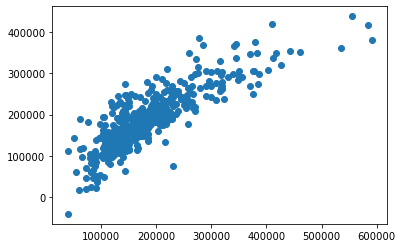

In [33]:
plt.scatter(y_test,test_preds);

In [46]:
mean_squared_error(train_preds,y_train, squared = False)

42730.52050592751

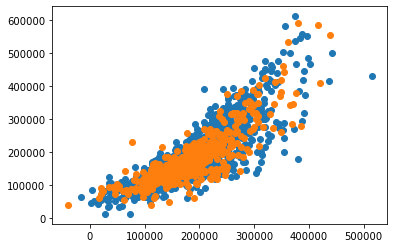

In [35]:
plt.scatter(linreg.predict(X_train) , y_train);
plt.scatter(linreg.predict(X_test) , y_test);
plt.savefig('Predictions Vs Reality.png')

In [47]:
train_preds = linreg.predict(X_train)
math.sqrt(mean_squared_error(train_preds,y_train))

42730.52050592751

# Predictions

In [36]:
# Read in the Dataframe
test_csv = pd.read_csv('../datasets/Clean_Test.csv')

In [37]:
# check that is shape is right!
print(test_csv.shape)
test_csv.head()

dfi.export(test_csv,'sample.png', max_rows = 5)

(878, 7)


In [38]:
test_csv.head()

,Id,Lot_Area,Central_Air,Sq_ft,Has_Garage,Large_Lot,Finished_Basement
0,2658,9142,0,2948,1,0,0
1,2718,9662,1,3934,1,0,0
2,2414,17104,1,2150,1,1,1
3,1989,8520,1,1936,1,0,0
4,625,9500,1,2788,1,0,1


In [40]:
# select the features from our Test CSV that match the features in our model
features = [col for col in test_csv if col != 'Id']

# assign those features to test_X
test_X = test_csv[features]


In [ ]:
# Get predictions for the test_csv
sub_pred = linreg.predict(X)
sub_pred

In [ ]:
submission_predictions = pd.DataFrame(sub_pred, index=test_csv['Id'])

In [ ]:
# DO NOT RUN ME TWICE 
# for changing the name of the Sale Price Column 
submission_predictions['SalePrice'] = submission_predictions[0]
submission_predictions.drop(columns = 0, inplace = True)


In [ ]:
print(submission_predictions.shape)
submission_predictions.head()

In [ ]:
# Export clean CSV for kaggle submission 
submission_predictions.to_csv('../datasets/Submission.csv')

# Conclusion

Our final model is a simple Linear one using polynomial features.

|Metric|Score|
|---|---|
| R2 | 0.75 |
| RMSE | 42,730|


Using as few features as possible we have gotten to a 76% R2 score and our predictions are off by around 42,000 each. Out model still needs a lot of work to be more accurate, but we are doing a doo job of getting a good picture with fewer variables.